# Practica de codificación parcial 2 

1. Tome el dataset `load_digits` y constituya el arreglo de imágenes $X$ y el de etiquetas $y$ como arreglos de numpy de valores de tipo int64. 

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits 

from sklearn.model_selection import StratifiedShuffleSplit 

from sklearn.preprocessing import StandardScaler 

# modelo 

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 

#medida de desempeño

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve 

# afinamiento del modelo 

from sklearn.model_selection import GridSearchCV 


In [2]:
X,y = load_digits(return_X_y = True) 

In [3]:
type(X)

numpy.ndarray

In [4]:
type(y)

numpy.ndarray

In [9]:
X[0].reshape(8,8) 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
y[0]

0

2. Visualice con la función`imshow()` de matplotlib una de las imagenes del dataset. 

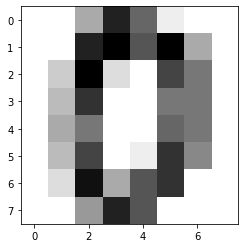

In [10]:
plt.imshow(X[0].reshape(8,8), cmap = 'binary') 

3. Divida el dataset en un subconjunto para entrenamiento y un subconjunto de testeo, pero para esta tarea relice muestreo estratificado utilizando la clase `StratifiedShuffleSplit` del `model_selection` de Sklearn.   

* **(opcional)** y muestre con histogramas que este muestreo ha quedado de manera estratificada, es decir, las muestras quedaron de tal menera que cada digito en la muestra esta presente en la misma proporción que en el dataset total. 

In [12]:
sss = StratifiedShuffleSplit(n_splits = 1, random_state = 42) 

In [14]:
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

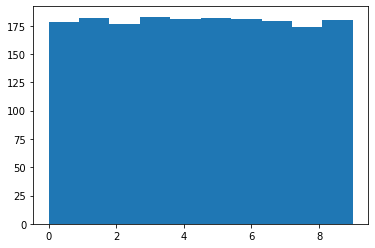

In [15]:
plt.hist(y)


(array([160., 164., 159., 165., 163., 164., 163., 161., 156., 162.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

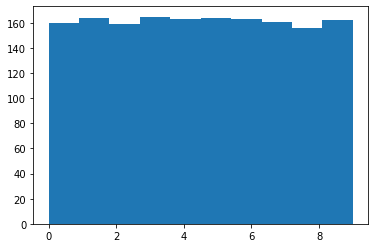

In [16]:
plt.hist(y_train)


(array([18., 18., 18., 18., 18., 18., 18., 18., 18., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

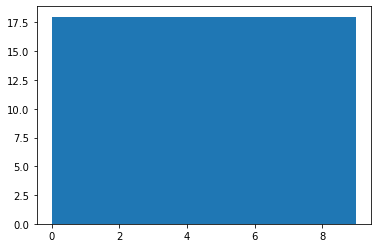

In [17]:
plt.hist(y_test)


4. Escale los datos con utilizando la clase `MaxMinScaler` o la clase `StandardScaler` del módulo `preprocessing` de sklearn. 

In [19]:
escalador = StandardScaler()

In [20]:
X_train_escalado = escalador.fit_transform(X_train) 

5. Instancie y entrene los modelos `SGDClassifier` del módulo `linear_model` y el `RandomForestClassifier` del módulo `ensemble` de sklearn. 

* **(opcional)** empiece comparando en cuanto al criterio de exactitud
  * utilice la función `cross_val_score` del modulo `model_selection` de sklearn
* luego en cuanto al criterio de matriz confusión:
  * utilice la función `cross_val_predict` del modulo `model_selection` de sklearn y luego
  * utilice la función `confusion_matrix` del módulo `metrics` de sklearn. 
* **(opcional)** siga con el criterio de precisión y recall.


In [70]:
sgd_clf = SGDClassifier()
forest_clf = RandomForestClassifier(random_state = 42) 

In [71]:
sgd_clf.fit(X_train_escalado, y_train)
forest_clf.fit(X_train_escalado, y_train) 

RandomForestClassifier(random_state=42)

6. Mida sus desempeños con la metodología de Validación cruzada y luego afine el modelo seleccionado con la metodología de Grilla de hiperparámetros. 

* Para el SGDClassifier utilice los pararámetros de `alpha` con valores $[10^{-1}, 10^{-2}]$, `learning_rate` con valores en la lista `[0.1,0.01, 0.001]` y `penalty` con valores en la lista `['l1', 'l2']`.

* Para el RandomForestClassifier utilice los parametros `max_feature` con valores en la lista `[2,3,10,20, 30, 40, 50]`,  `max_deph` con valores en la lista `[2,3]` y `n_estimators` con valores en la lista `[3,10,30,100]`.

In [72]:
y_pred_sgd = cross_val_predict(sgd_clf, X_train_escalado, y_train, cv = 3 )
y_pred_forest = cross_val_predict(forest_clf, X_train_escalado, y_train, cv = 3 )

In [73]:
mc_sgd = confusion_matrix(y_train, y_pred_sgd)
mc_forest = confusion_matrix(y_train, y_pred_forest)

In [74]:
mc_sgd


array([[157,   0,   0,   0,   0,   0,   1,   1,   1,   0],
       [  0, 150,   0,   1,   1,   0,   0,   0,   9,   3],
       [  0,   2, 152,   1,   0,   0,   0,   2,   2,   0],
       [  0,   0,   0, 156,   0,   4,   0,   1,   4,   0],
       [  1,   1,   0,   0, 155,   0,   1,   0,   3,   2],
       [  0,   1,   0,   0,   0, 156,   0,   1,   2,   4],
       [  0,   1,   0,   0,   0,   1, 158,   0,   3,   0],
       [  0,   0,   0,   2,   1,   0,   0, 156,   1,   1],
       [  0,   3,   1,   2,   0,   1,   0,   0, 148,   1],
       [  0,   3,   0,  11,   0,   0,   0,   3,   4, 141]], dtype=int64)

In [75]:
mc_forest

array([[158,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 163,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 157,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 159,   0,   1,   0,   2,   2,   1],
       [  0,   0,   0,   0, 160,   0,   0,   2,   0,   1],
       [  1,   0,   0,   2,   1, 158,   1,   0,   1,   0],
       [  2,   0,   0,   0,   0,   0, 160,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 158,   1,   1],
       [  0,   4,   3,   2,   1,   2,   0,   0, 144,   0],
       [  0,   1,   0,   2,   0,   1,   0,   2,   2, 154]], dtype=int64)

En cuanto a este creterio me quedo con RandomForestClassifier 


# Afinemos el modelo escogido `RandomForestClassifier` 

In [80]:
grid_param = {
    'max_depth':[10,15,20],\
    'max_features':[3,5,7], \
    'n_estimators':[100,150,200]
}

In [81]:
grid_search_forest = GridSearchCV(forest_clf, grid_param, cv = 3, scoring = 'f1_macro', \
                                 return_train_score = True) 

In [82]:
%%time 

grid_search_forest.fit(X_train_escalado, y_train)

Wall time: 1min 16s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 5, 7],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='f1_macro')

In [83]:
grid_search_forest.best_params_ 

{'max_depth': 20, 'max_features': 5, 'n_estimators': 150}

In [89]:
mejor_modelo = grid_search_forest.best_estimator_

In [87]:
X_test_escalado = escalador.transform(X_test) 

In [91]:
y_pred_test = mejor_modelo.predict(X_test_escalado)

In [92]:
confusion_matrix(y_test, y_pred_test)

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 15,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 17]], dtype=int64)

**Conclusión** Hemos encontrado un modelo adecuado de clasificación multiclase. 

In [96]:
mejor_modelo.score(X_test_escalado,y_test) 

0.9777777777777777